## Problem Statement:

BoomBikes, a US-based bike-sharing provider, has experienced a significant decline in revenues due to the ongoing Corona pandemic. As the company faces challenges in sustaining its business in the current market, it seeks to develop a mindful business plan to accelerate revenue growth once the lockdown ends and the economy restores to a healthy state. To achieve this, BoomBikes aims to understand the factors affecting the demand for shared bikes in the American market and how these factors can help predict bike-sharing demand after the pandemic subsides. The company has collected a large dataset on daily bike demands across the American market based on various meteorological surveys and people's preferences.

## Objective:

The goal of this analysis is to create a multiple linear regression model using the available independent variables to predict the demand for shared bikes. The model will assist BoomBikes' management in understanding how the demand varies with different features, allowing them to tailor their business strategy to meet demand levels and customer expectations. Additionally, the model will serve as a valuable tool for understanding the demand dynamics in new markets.

## Overview of the Analysis Steps:

1. Dataset Evaluation: Assess the dataset's quality and consistency, making necessary adjustments to ensure it is suitable for analysis.
2. Exploratory Data Analysis (EDA): Perform an in-depth examination of the dataset to uncover patterns, trends, and relationships between variables.
3. Data Preprocessing: Convert categorical variables into dummy variables using Pandas, ensuring that the regression model can effectively utilize these features.
4. Split the dataset: Divide the dataset into training (70%) and test (30%) sets to evaluate the model's performance on unseen data.
5. Model Building: Develop a multiple linear regression model using the training data, taking 'cnt' as the target variable (total number of bike rentals).
6. Model Evaluation: Assess the model's performance using the test data by calculating the R-squared score.
7. Interpretation of Results: Analyze the coefficients of the best-fitted line to understand the impact of different variables on bike-sharing demand.
8. Provide Recommendations: Offer actionable insights and suggestions to BoomBikes based on the analysis to help them optimize their business strategy and better serve their customers.

By following these steps, we will develop a robust multiple linear regression model to predict the demand for shared bikes, enabling BoomBikes to make well-informed decisions and better cater to customer needs.

In [4]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import Important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read Data
df=pd.read_csv("./day.csv")

## 1. Data understanding
Before diving into the model building process, it's essential to evaluate and understand the dataset thoroughly. Dataset evaluation involves several steps that help us gain insights into the data, identify potential issues, and prepare the data for modeling.

In this case study, we'll begin by loading the dataset into a Pandas DataFrame and exploring its structure, including the number of rows and columns, column data types, and descriptive statistics. This will give us an idea of the size and scope of the data, as well as the range and distribution of values for each variable.

In [7]:
# Data sanity check
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
#Check null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# instant looks index column which will not contribute in analysis, simply drop it
df.drop(['instant'],axis=1,inplace=True)

In [12]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
#dteday does not looks much impressive as we have smilar column available like yr,mnth,weekday etc. drop it straight away
df.drop(['dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
#casual & registered (cnt) will make our analysis more complicated, so better remove them and cnt is our target variable
df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# lets check another sanity point, is datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [16]:
# Looking into data, we can say season,yr,mnth,holiday,weekday,workingday,weathersit  are categorical variables, so better replace with more meaningful name
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [17]:
df.head(30)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.181250,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.686950,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.470250,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.606100,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.463500,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.378268,11.660450,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist_cloudy,8.057402,10.441950,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist_cloudy,6.765000,8.112700,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear_Few Clouds,5.671653,5.808750,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear_Few Clouds,6.184153,7.544400,48.2917,14.958889,1321


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [19]:
#Freezing datatypes of numerical columns to appropriate types
df[['temp','atemp','hum','windspeed','cnt']]=df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


## 2. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an essential step in any data-driven project, as it helps uncover patterns, trends, and relationships within the data. EDA allows us to develop a better understanding of the dataset, identify potential issues, and inform the feature selection and model building process. By incorporating visualizations and statistical analyses, we can gain insights that will ultimately lead to more accurate and reliable models.

In this case study, we'll perform EDA on the bike-sharing dataset using the following techniques:

1. Univariate Analysis: We'll start by analyzing each variable individually, examining their distribution and central tendencies. For continuous variables, we can use histograms or density plots to visualize the distribution, while for categorical variables, we can use bar plots to show the frequency of each category. This step will help us identify outliers, skewness, and potential data entry errors.

2. Bivariate Analysis: Next, we'll explore the relationships between pairs of variables. For continuous variables, scatter plots can help visualize the relationships and identify trends or patterns. For categorical variables, we can use stacked bar plots or cross-tabulations to examine the relationship between categories. This step will help us understand the interactions between variables and identify potential confounding factors.

3. Multivariate Analysis: To analyze the relationships between multiple variables simultaneously, we can use techniques such as heatmap visualizations for correlation matrices or pair plots for scatter plot matrices. These visualizations can reveal complex interactions and relationships between variables, which can be useful for feature selection and model building.

4. Statistical Analysis: We'll also perform statistical tests to measure the strength and significance of the relationships between variables. For example, we can use correlation coefficients to quantify the linear association between continuous variables, or chi-square tests to assess the independence of categorical variables. This step will help us determine which variables are likely to have the most significant impact on our target variable and should be included in our model.

By conducting a comprehensive EDA, we'll be able to identify the most important features and potential issues in our dataset. This knowledge will help inform our feature engineering and model building efforts, ultimately leading to a more accurate and reliable multiple linear regression model for predicting the demand for shared bikes.

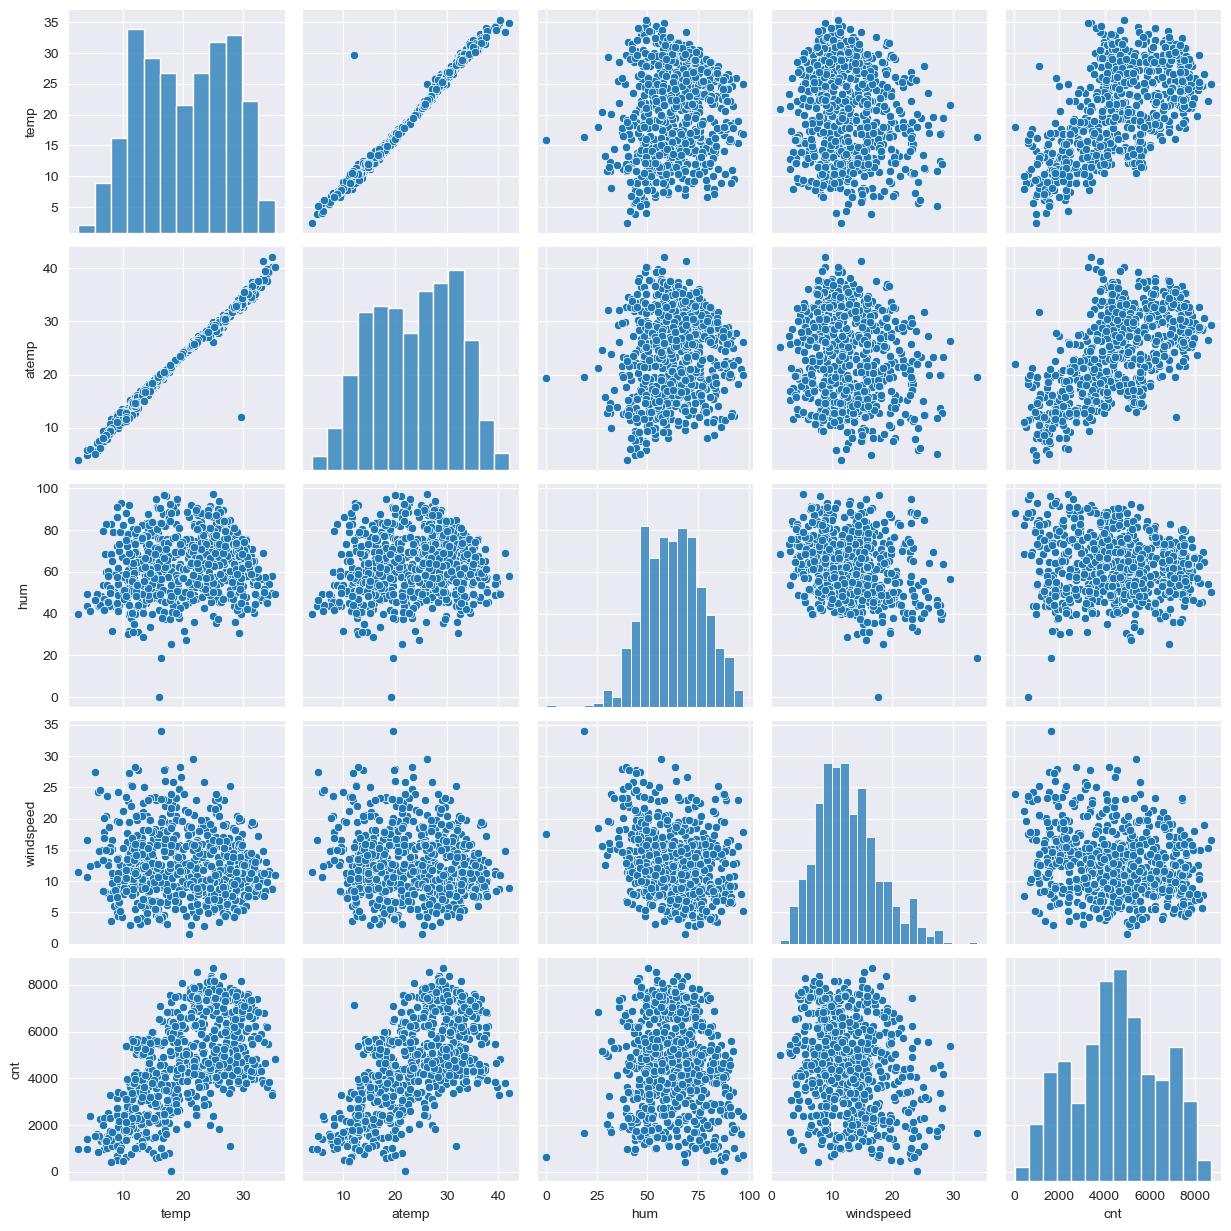

In [20]:
## Checking correlation in 5 numerical variable
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

## Observation Based On Above Pair Plots

In the bike-sharing dataset, the variables `temp` and `atemp` represent the actual temperature and the "feels-like" temperature, respectively. After creating a pair plot to visualize the relationships between variables, we observe that `temp` and `atemp` are highly correlated. This high correlation suggests a strong linear relationship between these two variables, indicating that they convey similar information about the temperature conditions on a given day.

The high correlation between `temp` and `atemp` raises concerns about multicollinearity, which occurs when two or more independent variables in a regression model are highly correlated. Multicollinearity can lead to unreliable and unstable estimates of the regression coefficients, making it difficult to interpret the individual contribution of each variable to the model.

To address this issue, we can consider removing one of the correlated variables from our feature set before building the multiple linear regression model. In this case, since `temp` and `atemp` convey similar information, we can choose to keep only one of them, such as `temp`, as a representative of the temperature conditions. This will help mitigate the impact of multicollinearity on our model, resulting in more accurate and reliable predictions of shared bike demand.

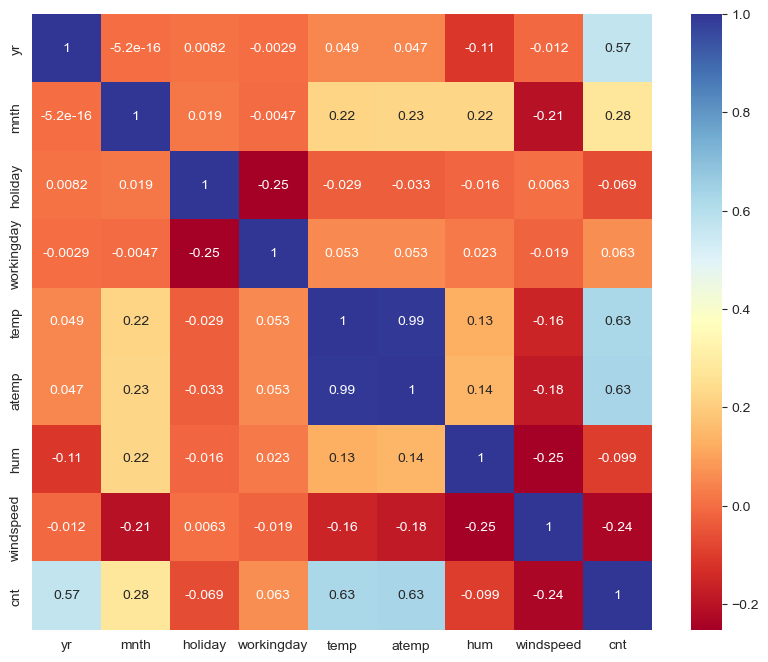

In [21]:
## Lets check the correlation
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap="RdYlBu")
plt.show()

In [22]:
# Correlation between temp and atemp ~1 better drop it
df.drop(['temp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


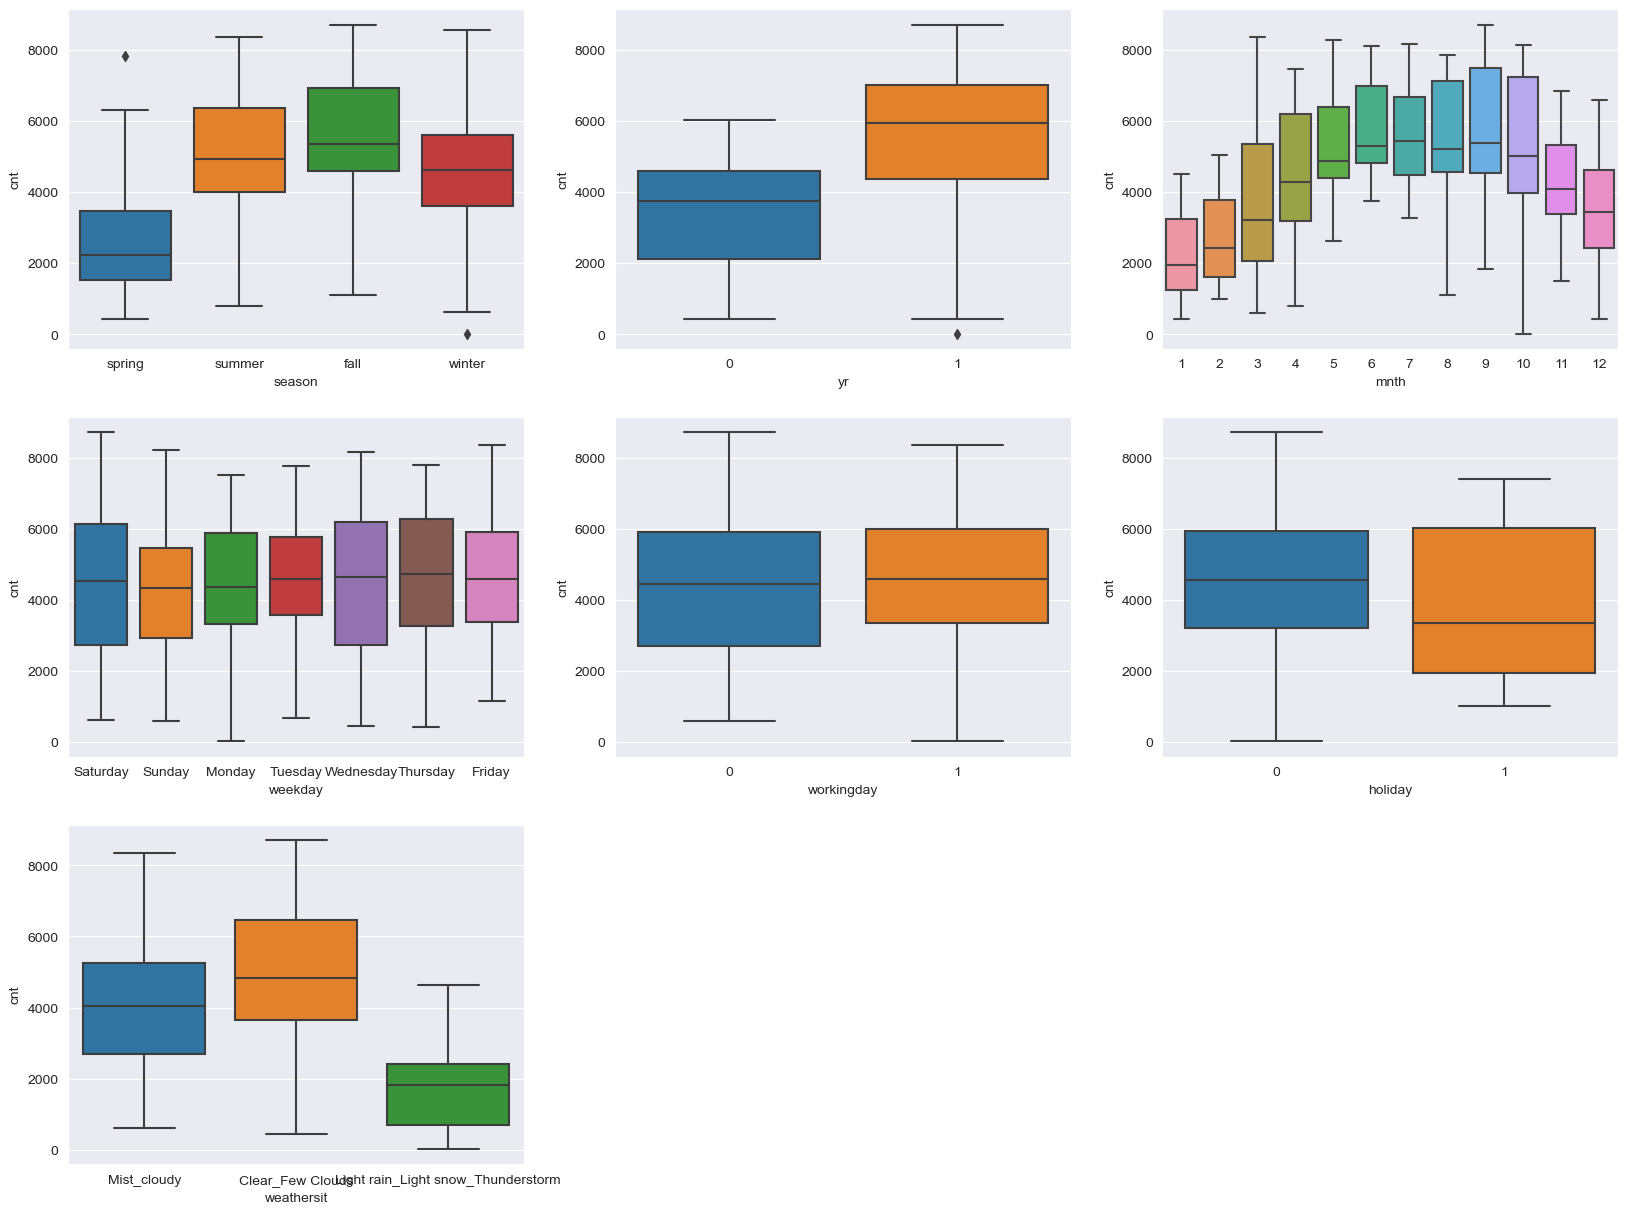

In [23]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

## 3. Creating the dummy variable
Creating dummy variables, also known as one-hot encoding, is a crucial step in preparing categorical data for machine learning algorithms. Most algorithms require numerical inputs, and by converting categorical variables into a series of binary variables (0s and 1s), we can represent the categories in a format that can be easily used by the algorithms. This process helps preserve the distinct information held by each category without imposing an artificial order or hierarchy on the data.

In this case study, we'll create dummy variables for the categorical features in the bike-sharing dataset. Here's an explanation of the process:

1. Identify categorical variables: First, we'll identify the categorical variables in our dataset that need to be converted into dummy variables. In our case, these are 'weathersit' and 'season'.

2. Convert to appropriate data type: Before creating dummy variables, we need to ensure that these categorical variables are of the appropriate data type. We'll convert the identified variables into the 'str' (string) data type, which indicates that they are categorical.

3. Create dummy variables: Next, we'll use the Pandas 'get_dummies' function to create dummy variables for each of the categorical features. The 'drop_first' parameter is set to 'True' to avoid multicollinearity issues, as one less dummy variable is needed to represent all the categories (since one category can be inferred from the others).

4. Update the feature set: After creating dummy variables, we'll update our feature set (X) to include the newly created binary columns and exclude the original categorical columns. This will ensure that our machine learning model can effectively use the categorical information during the training and prediction process.

By creating dummy variables for the categorical features in our dataset, we ensure that our multiple linear regression model can effectively incorporate the information held by these categorical variables, leading to more accurate and reliable predictions of shared bike demand.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 62.9+ KB


In [25]:
# Converting into object
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [26]:
df['season']

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [27]:
df['weathersit']

0           Mist_cloudy
1           Mist_cloudy
2      Clear_Few Clouds
3      Clear_Few Clouds
4      Clear_Few Clouds
             ...       
725         Mist_cloudy
726         Mist_cloudy
727         Mist_cloudy
728    Clear_Few Clouds
729         Mist_cloudy
Name: weathersit, Length: 730, dtype: object

In [28]:
df['weekday']

0       Saturday
1         Sunday
2         Monday
3        Tuesday
4      Wednesday
         ...    
725     Thursday
726       Friday
727     Saturday
728       Sunday
729       Monday
Name: weekday, Length: 730, dtype: object

In [29]:
df['mnth']

0       1
1       1
2       1
3       1
4       1
       ..
725    12
726    12
727    12
728    12
729    12
Name: mnth, Length: 730, dtype: object

# Convert categorical variable into dummy/indicator variables
In the bike-sharing dataset, there are four categorical variables that need to be converted into dummy variables: 'season', 'weathersit', 'weekday', and 'mnth'. To perform this conversion, we use the Pandas library's get_dummies function, which creates binary columns for each category of the categorical variables and removes the original categorical columns from the DataFrame.


In [30]:
SeasonCondition=pd.get_dummies(df['season'],drop_first=True)
WeatherCondition=pd.get_dummies(df['weathersit'],drop_first=True)
DayOfWeek=pd.get_dummies(df['weekday'],drop_first=True)
MonthName=pd.get_dummies(df['mnth'],drop_first=True)

The above code snippet creates dummy variables for each of the four categorical variables:

1. `SeasonCondition`: This DataFrame contains dummy variables representing the different seasons, excluding the first season to avoid multicollinearity issues.
2. `WeatherCondition`: This DataFrame contains dummy variables representing the various weather conditions, excluding the first weather condition to avoid multicollinearity issues.
3. `DayOfWeek`: This DataFrame contains dummy variables representing the days of the week, excluding the first day to avoid multicollinearity issues.
4. `MonthName`: This DataFrame contains dummy variables representing the months, excluding the first month to avoid multicollinearity issues.

The `drop_first=True` parameter is used in each `get_dummies` function call to eliminate one dummy variable from each set, as one less dummy variable is needed to represent all the categories (since one category can be inferred from the others). This helps avoid multicollinearity issues in the regression model.

After creating these DataFrames with dummy variables, we can concatenate them with the original dataset and remove the original categorical columns. This will ensure that our machine learning model can effectively use the categorical information during the training and prediction process, ultimately leading to more accurate and reliable predictions of shared bike demand.

In [31]:
SeasonCondition

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [32]:
WeatherCondition

,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [33]:
DayOfWeek

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [34]:
MonthName

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,1


In [35]:
df=pd.concat([df,SeasonCondition],axis=1)
df=pd.concat([df,WeatherCondition],axis=1)
df=pd.concat([df,DayOfWeek],axis=1)
df=pd.concat([df,MonthName],axis=1)

In [36]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,3,4,5,6,7,8,9,10,11,12
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#Dropping the older variable season, weathersit,weekday,mnth
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

df.drop(['weekday'],axis=1,inplace=True)

df.drop(['mnth'],axis=1,inplace=True)


df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Split into training and test data
Splitting the data into training and test sets is a crucial step in the machine learning process, as it allows us to evaluate the performance of our model on unseen data. This helps us ensure that our model generalizes well to new data and is not overfitting to the training data.


In [38]:
# Import sklearn library needed for data split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)



We are using the `train_test_split` function from the `sklearn.model_selection` module to split the dataset into training and test sets. The `train_size` parameter is set to 0.7, indicating that 70% of the data will be used for training, while the `test_size` parameter is set to 0.3, which means that the remaining 30% will be used for testing. The `random_state` parameter is set to 100, ensuring that the data split will be consistent across multiple runs, allowing for reproducibility of results.

By setting the random seed using `np.random.seed(0)`, we ensure that the random number generator produces the same set of random numbers each time the code is run. This helps maintain consistency in the data splitting process and allows for more reliable comparisons between different models or iterations.

Once the data is split into training and test sets, we can proceed to fit our multiple linear regression model using the training data and evaluate its performance using the test data. This will give us an indication of how well our model generalizes to new, unseen data and help us make more accurate and reliable predictions of shared bike demand.

In [39]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [40]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
df_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [42]:
# Numberical variable scalling function
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [43]:
NumVar=['atemp','hum','windspeed','cnt']
df_train[NumVar] = scaler.fit_transform(df_train[NumVar])

In [44]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [45]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# X and Y creating
y_train = df_train.pop('cnt')
X_train = df_train

In [47]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [48]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

# Importing RFE library

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
# RFE method for feature selection, and lets take 15 variable

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
column = X_train.columns[rfe.support_]
column

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
X_train_rfe = X_train[column]

In [ ]:
# Model using Statsmodel , import library and add constant

import statsmodels.api as sm
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [ ]:
#OLS best fit
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [ ]:
lm.summary()

## Identify VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_rfe1.head()

In [ ]:
# dropping variable "hum" due to very high vif and re-process the model
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [ ]:
import statsmodels.api as sm
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [ ]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [ ]:
lm1.summary()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# dropping variable "atemp" due to very high vif and re-process the model
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [ ]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
lm2.summary()

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# dropping variable "windspeed" due to very high vif, dropping vif >2 and re-process the model
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [ ]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
lm3.summary()

In [ ]:
# dropping variable "winter" due to very high p-value and re-process the model
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [ ]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
lm4.summary()

In [ ]:
# dropping variable "4" due to very high p-value and re-process the model
X_train_rfe=X_train_rfe.drop([4],axis=1)

In [ ]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
lm5.summary()

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Now we can start adding variable to check if model improves, lets take Saturday

X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()

In [ ]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
lm6.summary()

In [ ]:
#Saturday does not work as it has high p-values, lets drop this
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [ ]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
lm7.summary()

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#lets take Sunday, check if model improves
X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

In [ ]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
lm8.summary()

In [ ]:
#Sunday does not work as it has high p-values, lets drop this
X_train_rfe=X_train_rfe.drop(['Sunday'],axis=1)

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [ ]:
# Lets take workingday, check if model improves
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

In [ ]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
lm9.summary()

In [ ]:
#workingday does not work as it has high p-values, lets drop this
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [ ]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
lm10.summary()

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Lets take 2, check if model improves
X_train_rfe[2]=X_train[2]
X_train_rfe.head()

In [ ]:
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
lm11.summary()

In [ ]:
#2 does not work as it has high p-values, lets drop this
X_train_rfe=X_train_rfe.drop([2],axis=1)

In [ ]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
lm12.summary()

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# lets take 7, check if model improves
X_train_rfe[7]=X_train[7]
X_train_rfe.head()

In [ ]:
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
lm13.summary()

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#model improved adding 7

In [ ]:
#lets take 10, check if model improves
X_train_rfe[10]=X_train[10]
X_train_rfe.head()

In [ ]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
lm14.summary()

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#model improved adding 10

In [ ]:
#lets take 11, check if model improves
X_train_rfe[11]=X_train[11]
X_train_rfe.head()

In [ ]:
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
lm15.summary()

In [ ]:
# 11 does not work as it has high p-values, lets drop this


X_train_rfe=X_train_rfe.drop([11],axis=1)

In [ ]:
X_train_rfe16= sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
lm16.summary()

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#lets take 12, check if model improves
X_train_rfe[12]=X_train[12]
X_train_rfe.head()

In [ ]:
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
lm17.summary()

In [ ]:
# 12 does not work as it has high p-values, lets drop this

X_train_rfe=X_train_rfe.drop([12],axis=1)

In [ ]:
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()
lm18.summary()

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Monday does not work as it has high p-values, lets drop this
X_train_rfe['Monday']=X_train['Monday']
X_train_rfe.head()

In [ ]:
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()
lm19.summary()

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#lets take 12, check if model improves
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()

In [ ]:
X_train_rfe21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe21).fit()
lm21.summary()

In [ ]:
# Tuesday does not work as it has high p-values, lets drop this
X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)

In [ ]:
X_train_rfe22 = sm.add_constant(X_train_rfe)
lm22 = sm.OLS(y_train,X_train_rfe22).fit()
lm22.summary()

In [ ]:
# Monday does not work as it has high p-values, lets drop this
X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

In [ ]:
X_train_rfe22 = sm.add_constant(X_train_rfe)
lm23 = sm.OLS(y_train,X_train_rfe22).fit()
lm23.summary()

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#lets take Wednesday, check if model improves
X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()

In [ ]:
X_train_rfe24 = sm.add_constant(X_train_rfe)
lm24 = sm.OLS(y_train,X_train_rfe24).fit()
lm24.summary()

In [ ]:
# Wednesday does not work as it has high p-values, lets drop this
X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)

In [ ]:
X_train_rfe25 = sm.add_constant(X_train_rfe)
lm25 = sm.OLS(y_train,X_train_rfe25).fit()
lm25.summary()

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
#lets take Thursday, check if model improves
X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()

In [ ]:
X_train_rfe26 = sm.add_constant(X_train_rfe)
lm26 = sm.OLS(y_train,X_train_rfe26).fit()
lm26.summary()

In [ ]:
# Thursday does not work as it has high p-values, lets drop this
X_train_rfe=X_train_rfe.drop(['Thursday'],axis=1)

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# We can see lm14 gives best result after we completed all variables.

In [ ]:
#We will find predictive values
y_train_cnt = lm14.predict(X_train_rfe14)

In [ ]:
#import the library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Resdual calculation
res=y_train - y_train_cnt

In [ ]:
# Assumption of Normality
# Errors term Histogram
fig = plt.figure()
sns.distplot((res), bins = 25)
fig.suptitle('Error Terms', fontsize = 30)
plt.xlabel('Errors', fontsize = 24)

In [ ]:
X_train_rfe14.shape

In [ ]:
res.shape

In [ ]:
#Now scalling Test data on model

NumVar=['atemp','hum','windspeed','cnt']
df_test[NumVar] = scaler.fit_transform(df_test[NumVar])

In [ ]:
# x and y test sets creation

y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
X_train_new=X_train_rfe14.drop(['const'], axis=1)

## We are good to use model for prediction

In [ ]:
# X_test_new dataframe with variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Now making prediction on the newly created data set

y_pred = lm14.predict(X_test_new)

In [ ]:
#CHECKING PREDICTED V/s TEST DATA

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

## We can easily see Actual (y_test) and predicted (y_pred) cross each other most of the times, which itself explain the hange in demand.

In [ ]:
# Import library for MSE and R square
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Square root of MSE
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
#Calculate the r square for test

r2 = r2_score(y_test, y_pred)
r2

R square of our model is 79.5

In [ ]:
X_train=X_train_new.iloc[:,0].values

In [ ]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_train,res)
fig.suptitle('Independent variables vs Residuals', fontsize=20)
plt.xlabel('Independent variables', fontsize=18)
plt.ylabel('Residuals', fontsize=16)
plt.show()

In [ ]:
X_train_new.head()

In [ ]:
X_train_rfe14.columns

In [ ]:
lm14.summary()

# Equation for best fitted line can be drawn as below


_cnt= 0.247 X yr - 0.0754 X holiday - 0.198 X Spring - 0.3154 X Light rain_Light snow_Thunderstorm - 0.088 X Mist_Cloudy +0.066 X 3 + 0.123 X 5 +0.148 X 6 +0.156 X 8 + 0.195 X 9  + 0.125 X 7 + 0.113 X 10_

The equation represents the best-fitted line for the multiple linear regression model trained on the bike-sharing dataset, with 'cnt' as the target variable, representing the total number of bike rentals on a given day. The equation can be interpreted as follows:

cnt = 0.247 * yr - 0.0754 * holiday - 0.198 * Spring - 0.3154 * Light rain_Light snow_Thunderstorm - 0.088 * Mist_Cloudy + 0.066 * 3 + 0.123 * 5 + 0.148 * 6 + 0.156 * 8 + 0.195 * 9 + 0.125 * 7 + 0.113 * 10

Each coefficient in the equation corresponds to the impact of a specific variable on the total number of bike rentals ('cnt'). The coefficients represent the change in 'cnt' for a one-unit increase in the corresponding variable, holding all other variables constant. Here's a brief explanation of the coefficients:

1. yr: A positive coefficient (0.247) indicates that the total number of bike rentals increases by 0.247 units for each additional year, suggesting an increase in demand for shared bikes over time.
2. holiday: A negative coefficient (-0.0754) implies that the total number of bike rentals decreases by 0.0754 units during holidays, indicating lower demand on these days.
3. Spring: A negative coefficient (-0.198) suggests that the total number of bike rentals decreases by 0.198 units in the spring season compared to the reference season (winter).
4. Light rain_Light snow_Thunderstorm: A negative coefficient (-0.3154) indicates that the total number of bike rentals decreases by 0.3154 units during days with light rain, light snow, or thunderstorms, showing a lower demand in unfavorable weather conditions.
5. Mist_Cloudy: A negative coefficient (-0.088) implies that the total number of bike rentals decreases by 0.088 units on misty or cloudy days, indicating a slightly lower demand on such days.
6. The remaining coefficients (0.066, 0.123, 0.148, 0.156, 0.195, 0.125, and 0.113) correspond to the different months, indicating the change in bike rentals for each month compared to the reference month (January). The positive coefficients show an increase in bike rentals during those months compared to January.

Overall, the equation helps us understand the factors affecting the demand for shared bikes and their respective impacts. This information can be used by the bike-sharing company to tailor their strategies and better meet customer expectations, ultimately leading to increased revenues and customer satisfaction.

## Suggestion Based On Analysis

Based on the analysis and the multiple linear regression model, it is accurate to say that the demand for bikes mainly depends on the following variables: yr, holiday, Spring, Mist_Cloudy, Light rain_Light snow_Thunderstorm, and months represented by 3, 5, 6, 7, 8, 9, and 10.

Here are some suggestions for BoomBikes company based on the analysis:

1. Focus on marketing and promotional activities during the months with higher demand (3, 5, 6, 7, 8, 9, and 10) to capitalize on the increased interest in bike-sharing during these periods.

2. Implement strategies to retain and attract more customers each year, as the demand for shared bikes is increasing over time (positive coefficient for yr).

3. Develop targeted promotions and discounts for non-holiday periods, as the demand for bikes is lower during holidays (negative coefficient for holiday). This could help maintain a consistent revenue stream throughout the year.

4. Consider offering incentives or discounts during the Spring season to counteract the lower demand compared to the reference season (winter).

5. Enhance the user experience on days with Mist_Cloudy and Light rain_Light snow_Thunderstorm conditions by providing additional services, such as rain covers, waterproof accessories, or real-time weather updates. This could help mitigate the decrease in demand during unfavorable weather conditions.

6. Analyze customer preferences and feedback to identify potential areas for improvement in the bike-sharing experience. This could help the company better meet customer expectations, which would lead to increased demand and customer satisfaction.

By considering these suggestions, BoomBikes can adapt their business strategy to cater to the varying demand levels and better serve their customers, ultimately leading to increased profitability and a stronger market presence.